# Hotel Booking Cancellation Prediction

## Data Description

Reference - [https://www.sciencedirect.com/science/article/pii/S2352340918315191]

This data was generated by Antonio, Almeida, and Nunes that contained two hotel booking information like resort (H1) and city hotel (H2). It was gathered from their databases by executing Transact-Structured Query Language (TSQL) query. All instances pertaining hotel or customer identification number were removed. It contains three years booking instances from 1st July, 2015 to 31st August, 2017.

The dataset contains a total of 31 features including all the booking information and 1 target variable(booking cancellation). It contains data from two hotels one being a city hotel containing 40,060 data points and other is a resort containing 79,330 data points. Description about each variable can be found from the above paper.

Both hotels are located in Portugal: H1 at the resort region of Algarve and H2 at the city of Lisbon.

Also a very important thing about working with time series data.When dealing with time-series data, we should pay more attention to data leakage. For example, if we somehow use data from the future when doing computations for current features or predictions, it is highly likely to end up with a leaked model. It generally happens when the data is randomly split into train and test subsets. 

**So, when working with time-series data, we put a cutoff value on time which might be very useful, as it prevents us from getting any information after the time of prediction.Same has been employed in this dataset, we put a cutoff of 1day**

* ADR : The average daily rate (ADR) measures the average rental revenue earned for an occupied room per day.

* Adults : No of Adults

* Agent : ID of the travel agency that made the booking

* ArrivalDateDayOfMonth : Day of the month of the arrival date

* ArrivalDateMonth : Month of arrival date with 12 categories: “January” to “December”

* ArrivalDateWeekNumber : Week number of the arrival date

* ArrivalDateYear : Year of arrival date

* AssignedRoomType : Code for the type of room assigned to the booking.

* Babies : Number of babies

* BookingChanges : Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation.

* Children : Number of children

* Company : ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons. (Generally for corporate stays)

* Country : Country of origin. Categories are represented in the ISO format.

* CustomerType : Type of booking, assuming one of four categories:	BO and BL
    
        Contract - when the booking has an allotment or other type of contract associated to it;
    
        Group – when the booking is associated to a group;
    
        Transient – when the booking is not part of a group or contract, and is not associated to other transient booking;
    
        ransient-party – when the booking is transient, but is associated to at least other transient booking

* DaysInWaitingList : Number of days the booking was in the waiting list before it was confirmed to the customer.

* DepositType : Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories. No    deposit,Non Refund and Refundable.

* DistributionChannel : Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”.

* IsRepeatedGuest : Value indicating if the booking name was from a repeated guest (1) or not (0).

* LeadTime : Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

* MarketSegment : Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”.

* Meal : Type of meal booked. Undefined/SC – no meal package;

        BB – Bed & Breakfast;

        HB – Half board (breakfast and one other meal – usually dinner);

        FB – Full board (breakfast, lunch and dinner)

* PreviousBookingsNotCanceled : Number of previous bookings not cancelled by the customer prior to the current booking.In case there was no customer profile associated with the booking, the value is set to 0. Otherwise, the value is the number of bookings with the same customer profile created before the current booking and not canceled.

* RequiredCardParkingSpaces : Number of car parking spaces required by the customer

* ReservationStatus : Reservation last status, assuming one of three categories

        Canceled – booking was canceled by the customer;

        Check-Out – customer has checked in but already departed;

        No-Show – customer did not check-in and did inform the hotel of the reason why.

* ReservationStatusDate : Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel.

* ReservedRoomType : Code of room type reserved. Code is presented instead of designation for anonymity reasons.

* StaysInWeekendNights : Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel.

* StaysInWeekNights : Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel.

* TotalOfSpecialRequests : Number of special requests made by the customer (e.g. twin bed or high floor)

## Problem Statement

> Motivation:

* My purpose of exploring the problem was to address the issue of booking cancellations in hotel management system. There are multiple instances where I observed people cancelling the booking owing to various reasons like price, better offers, poor reviews etc at the last moments.
I bet many of us have do this, can't blame us because it just comes down to our choice. But let us put ourself in the shoes of a hotel manager and explore the data to discover possible reasons and identify patterns to tackle this problem of cancelations.

> Strategies used by hotel:
* rigid cancellation policies and overbooking(booking excess than available). These can have negative impact on revenue and social reputation and also can really cause a bad customer experience.

> Problem Background:

* In the hotel management system, Booking cancellation act as a major factor for decision making regarding associated demands.It affects service and revenue of the hotel. Being able to predict cancellations can help us better manage resources, plan attractive offers, and make better pricing decisions as well.

> Business use-case:
* Hotels can use this model to effective predict the cancellations and according use the information to take decisions on revenue management.


> Statement:
* Perform a extensive exploratory data analysis to answer interesting questions about the data.
* Develop a model to predict the hotel booking cancellations.
* Identify the key features for the model.



## Performance Metric

It is a binary classification problem. Let us see which predictions that we want to improve by looking at what TP,TN,FP,FN.

* TP - Predicted that the booking will be cancelled and it is actually cancelled.

* TN - Predicted that the booking will be not be cancelled and booking is not cancelled.

* FP - Predicted that the booking will be cancelled and it is actually not cancelled.

* FN - predicted that the booking will not be cancelled and it is actually cancelled.


So it is clear that we want to focus on TP & TN minimizing FP. Even though FP class is critical, we want to equally prioritze the TP&TN.

So my choice will be **Accuracy**. 

> Note:
* I will use AUC-ROC for model selection and Accuracy to evaluate the final model performance.

## Data Cleaning

In [11]:
!pip install  missingno 

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px

plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
import warnings
warnings.simplefilter('ignore')

In [3]:
df = pd.read_csv('hotel_bookings.csv')

In [ ]:
df.shape

* There are 119390 instances,31 features and 1 target variable. 

In [9]:
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


* Agent and Children columns are float. It is odd. May be we can covert them into integer.

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

* 12 categorical columns and 20 numerical columns

In [1]:
df.isnull().sum()

NameError: name 'df' is not defined

<AxesSubplot:>

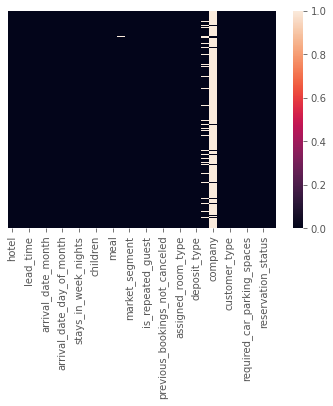

In [19]:
sns.heatmap(df.isnull(),yticklabels=False)

In [8]:
(df[['company','agent','country','children']].isna().sum()/df.shape[0])*100

company     94.306893
agent       13.686238
country      0.408744
children     0.003350
dtype: float64

In [211]:
df.company.value_counts()

40.0     927
223.0    784
67.0     267
45.0     250
153.0    215
        ... 
104.0      1
531.0      1
160.0      1
413.0      1
386.0      1
Name: company, Length: 352, dtype: int64

In [212]:
df.is_canceled.value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [213]:
df.loc[df.company == 40.0,'is_canceled'].value_counts(normalize = True)

0    0.916936
1    0.083064
Name: is_canceled, dtype: float64

* Company column contains huge amount of missing values(95%). Also we have only company ID numbers and not any other information regarding it. It basically means remaining all are private stays.So this column wont be useful for EDA also.

* **Since there are many missing values,Let us engineer a new feature private stay/corporate stay from the company column. I am losing out on information that some company might have more cancellations than others, but with this new column, i will only have 2 categories, so fewer dimensions after encoding.**

* Agent column contains around 14% of missing values. Agent column also contain ID and not the actual name.Most probably when agent is not mentioned, it will be a private booking. So let us impute these with 'Private category' and since these contain only ID numbers, Let us impute it with some numerical value(more like a discrete ID which is not currently present, It will work as a new ID)

* Country and children also contain few missing values but are very few.we will treat these columns.

* We will make a decision on which encoding technique to use for treating them after performing EDA and gaining some insights to improve our decision.

In [214]:
# Transforming the company column into only two categories, private booking/company booking.
# Transforming all the company booking to corporate and null values to private bookings
df.loc[df['company'].notnull(),'company'] = 'Corporate'
df['company'].fillna('Private',inplace=True)

In [215]:
df['company'].value_counts()

Private      112593
Corporate      6797
Name: company, dtype: int64

In [216]:
df.agent.value_counts()

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
289.0        1
432.0        1
265.0        1
93.0         1
304.0        1
Name: agent, Length: 333, dtype: int64

* I cannot really lose this information by again reducing categories for this column as well, so we will just impute a random number for the null values which will act as ID for the private booking cateogory.

In [217]:
df['agent'].fillna(0,inplace=True)

In [218]:
# Country, i will replace with mode.
country_mode = df.country.mode().values[0]
df['country'].fillna(country_mode,inplace = True)
# They are only 4 missing values out of lakhs, better place it with zero
df['children'].fillna(0,inplace=True)

<AxesSubplot:>

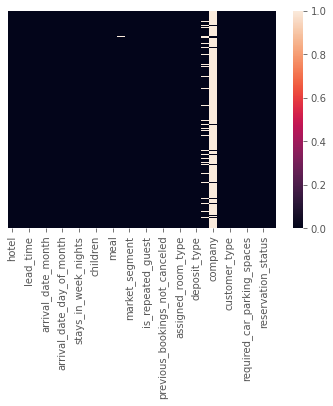

In [21]:
sns.heatmap(df.isnull(),yticklabels=False)

* **All the missing values are treated**

In [220]:
df.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390,119390,119390,119390,119390.000000,119390.000000,119390.000000,119390,119390,119390.000000,119390,119390.000000,119390,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,177,8,5,NaN,NaN,NaN,10,12,NaN,3,NaN,2,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB,PRT,Online TA,TA/TO,NaN,NaN,NaN,A,A,NaN,No Deposit,NaN,Private,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92310,49078,56477,97870,NaN,NaN,NaN,85994,74053,NaN,104641,NaN,112593,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,NaN,NaN,NaN,NaN,0.031912,0.087118,0.137097,NaN,NaN,0.221124,NaN,74.828319,NaN,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,NaN,NaN,NaN,NaN,0.175767,0.844336,1.497437,NaN,NaN,0.652306,NaN,107.141953,NaN,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,7.000000,NaN,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,9.000000,NaN,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,152.000000,NaN,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


* Lead time column is right skewed, can be seen from the presence of higher 75%,100% quartiles.
* children and babies have very few.
* From a total of 177 different countries, people have visited the hotels.
* There are 8 different market segment and 5 different distribution channels.
* There are 10 different categories of reserved rooms.
* 12 categories of assigned room types, may be they dont offer these extra two categories during prior reservation.
* days in waiting list column has very sparse data. Std is very high compared to mean.(might be due to outliers presence)
* ADR has negative value, may be noise. Also it little skewed.


In [221]:
# Lets check if there are duplicates values in the data
df.duplicated().sum()

32017

* There are around **26.8%** duplicate values in the data.

> What might be possible reasons?
* **Reason-1** : This dataset was extracted from a hotel database and they made this by combining different tables altogether, so might be that multiple tables gave some redundant data.
* **Reason-2** : one reason might be they oversampled/undersampled the data to avoid data imbalance.

In [222]:
df.is_canceled.value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [223]:
df2 = df[df.duplicated()]
df2.is_canceled.value_counts()

1    20200
0    11817
Name: is_canceled, dtype: int64

* This looks like, they just oversampled to avoid data imbalance.

In [224]:
df['market_segment'].value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [225]:
# Since there are only 2 rows of undefined category,Why waste a dimension if we one-hot encode?
# so lets just replace it with most frequent category.
df['market_segment'].replace('Undefined','Online TA',inplace = True)

In [226]:
df['distribution_channel'].value_counts()

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

In [227]:
df['distribution_channel'].replace('Undefined','TA/TO',inplace = True)

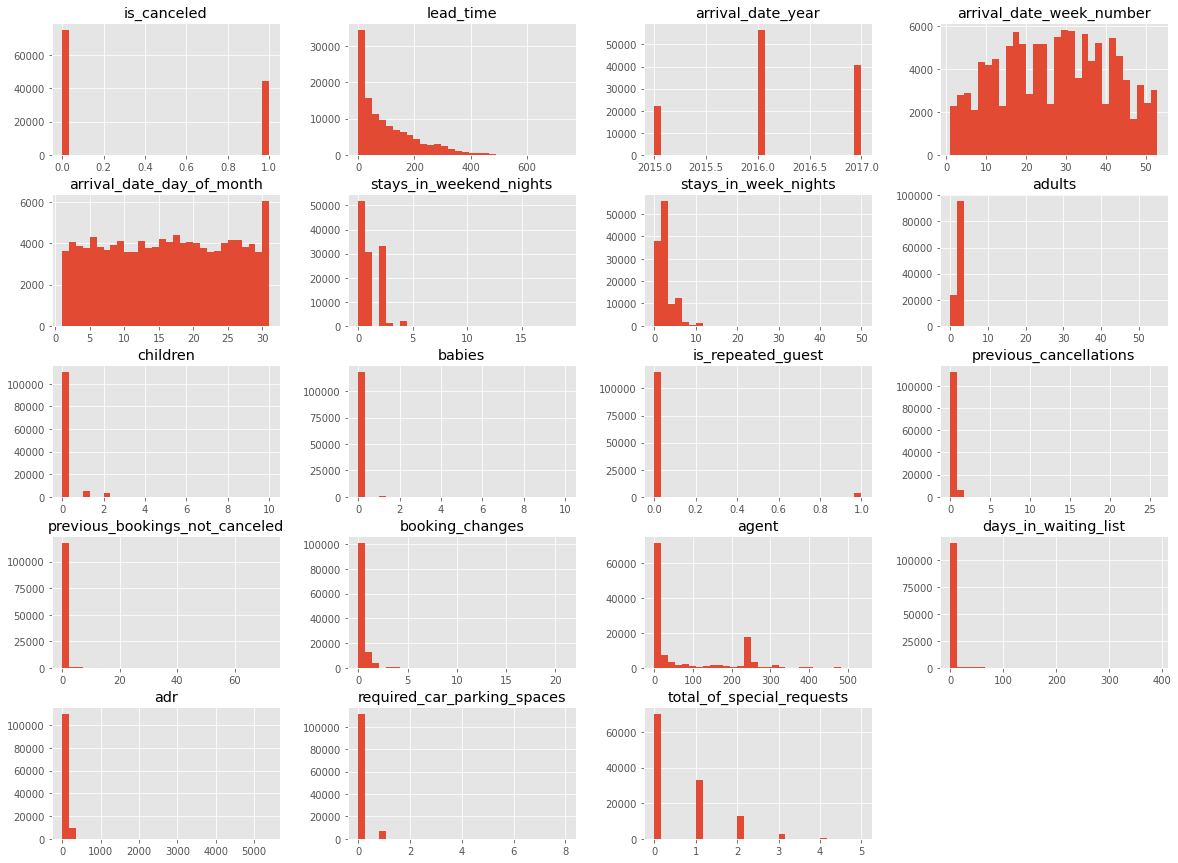

In [228]:
df.hist(bins=30,figsize=(20,15))
plt.show()

* Lead time looks like it follows a paretto distribution(80-20).
* arrival_date_day is a approximating a uniform distribution

In [229]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [230]:
# It doesn't make sense when there are no persons for the booking. So removing all these rows.
df.drop(df[df['adults']+df['children']+df['babies'] == 0].index,inplace=True)

## Exploratory Data Analysis

In [231]:
# Let us first split our dataset into city hotel and resort hotel.It gives us flexibility to explore both hotels
hotel = df.copy()
city_hotel = df.loc[(df.hotel=='City Hotel') & (df.is_canceled==0)].copy()
resort_hotel = df.loc[(df.hotel=='Resort Hotel') & (df.is_canceled==0)].copy()

In [232]:
print(f'Dimensions of City Hotel : {city_hotel.shape}')
print(f'Dimensions of Resort Hotel : {resort_hotel.shape}')

Dimensions of City Hotel : (46084, 32)
Dimensions of Resort Hotel : (28927, 32)


### Where do the guests come from?

In [15]:
## Let us make a dataframe including all the country data with % of people which will be useful for plotting
country_data = pd.DataFrame(df.loc[hotel["is_canceled"] == 0]["country"].value_counts())
country_data.rename(columns={"country": "Number of Guests"}, inplace=True)
country_data['Proportion_of_guests'] = round((country_data["Number of Guests"] / country_data['Number of Guests'].sum() * 100), 2)
country_data["country"] = country_data.index

NameError: name 'hotel' is not defined

In [14]:
# This graph shows from which countries did the hotel recieved booking doesnt matter whether guest actually showed up or not.
pie_chart = px.pie(df,
             names=hotel['country'].value_counts().index,
             values = hotel['country'].value_counts().values,
             title="Home country of guests(Including canceled)",
             template="seaborn")
pie_chart.update_traces(textposition="inside", textinfo="value+percent+label")
pie_chart.show()

NameError: name 'hotel' is not defined

In [235]:
pie_chart2 = px.pie(country_data,
             values="Number of Guests",
             names="country",
             title="Home country of guests",
             template="seaborn")
pie_chart2.update_traces(textposition="inside", textinfo="value+percent+label")
pie_chart2.show()

In [236]:
world_map = px.choropleth(country_data,
                    locations=country_data.index,
                    color=country_data["Proportion_of_guests"], 
                    hover_name=country_data.index, 
                    color_continuous_scale=px.colors.sequential.Plasma_r,
                    title="Home country of guests")
world_map.show()     

* Most people who made booking & also actually appeared are from **Portugal**. It makes sense since the hotel is located in portugal,so native people,most likely, do not cancel.
* Around 34.3% is contributed by the european countries. Portugal and european countries combined contributes to 65% of the guests.
* **This a important information suggesting the customer base of the hotel**
> Feature engineering insight:
* I will just categorize countries into home country, near_by and others. A total of 3 categories.

### How much do guests pay for a room per night?

* We will look at the prices for both resort hotel and city hotel.
* The prices vary depending upon the room type, seasons, type of meal offered.(can also vary for native and international visitors).
* We will use Average daily rate divided by no of guests excluding babies(since mostly babies are not counted as persons)

In [237]:
###

# Let us only consider the booking which are not cancelled
city_hotel['adr_pp'] = city_hotel['adr']/(city_hotel['adults'] + city_hotel['children'])
resort_hotel['adr_pp'] = resort_hotel['adr']/(resort_hotel['adults'] + resort_hotel['children'])
city_mean = round(city_hotel['adr_pp'].mean(),2)
resort_mean = round(resort_hotel['adr_pp'].mean(),2)

Price per night person in city hotel : 59.27€ 
 Price per night person in Resort hotel : 47.49€ 


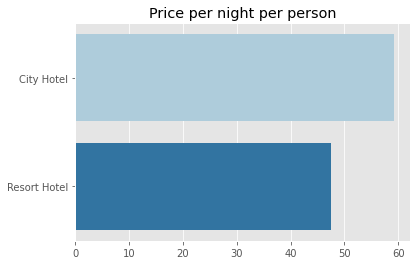

In [238]:
sns.barplot(x=[city_mean,resort_mean],y = ['City Hotel','Resort Hotel'],palette='Paired')
plt.title('Price per night per person')
print(f'Price per night person in city hotel : {city_mean}€ \n Price per night person in Resort hotel : {resort_mean}€ ')

In [239]:
# Let us see the how much guests pay depending upon the different categories of rooms offered
hotel['adr_pp'] = hotel['adr']/(hotel['adults'] + hotel['children'])
hotel_nc = hotel[hotel.is_canceled==0]

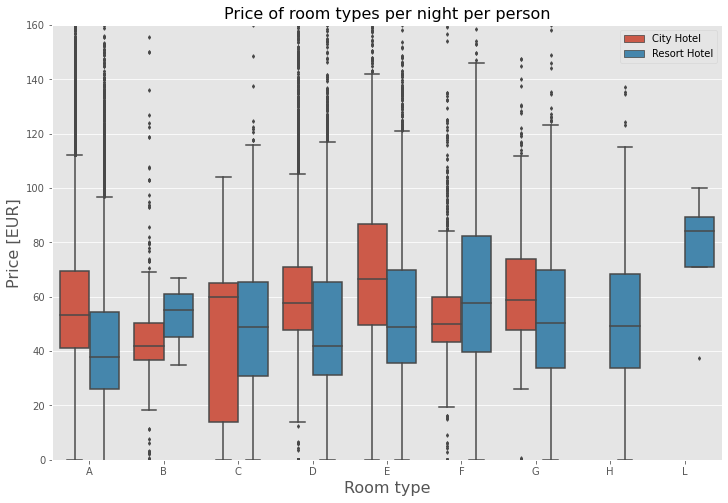

In [240]:
plt.figure(figsize=(12, 8))
sns.boxplot(data = hotel_nc, x = 'reserved_room_type' , y = 'adr_pp',hue = 'hotel',
            order = ['A','B','C','D','E','F','G','H','L'],hue_order=['City Hotel','Resort Hotel'],fliersize=2.5)
plt.title("Price of room types per night per person", fontsize=16)
plt.xlabel("Room type", fontsize=16)
plt.ylabel("Price [EUR]", fontsize=16)
plt.legend(loc="upper right")
plt.ylim(0, 160)
plt.show()

> General insight:
* These are the price distribution of each category of rooms.
* City hotel doesn't offer room types H&L, may be these are some exotic categories since price is also high.
* For most of the other categories, city hotel have higher price than resort except for B and F.
> Insight for model buliding:
* We have already seen ADR is left skewed and this plot shows it has many outliers, so we should deal with it.

In [241]:
# These are the mean revenue values combing both the city and resort
hotel_nc.groupby(by='reserved_room_type').agg({'adr_pp':['mean']})

,adr_pp
,mean
reserved_room_type,
A,53.511288
B,43.632365
C,50.497893
D,57.744783
E,59.993864
F,59.181135
G,56.587879
H,52.730983


* Room type **L** is having the highest average revenue per night per person.

### How does the price per night vary over the year


In [242]:
####
# Since we are looking at the demand side, we will consider all the bookings irrespective of cancelation 
month_dic = {'January': 1,'February' : 2,'March':3,'April':4,'May':5,'June':6,"July":7,
            "August":8,"September":9,"October":10,"November":11,'December':12}
room_prices_monthly = hotel_nc[["hotel", "arrival_date_month", "adr_pp"]]
room_prices_monthly['month_num'] = room_prices_monthly['arrival_date_month'].replace(month_dic)

In [243]:
room_prices_monthly = room_prices_monthly.sort_values(by=['month_num'])

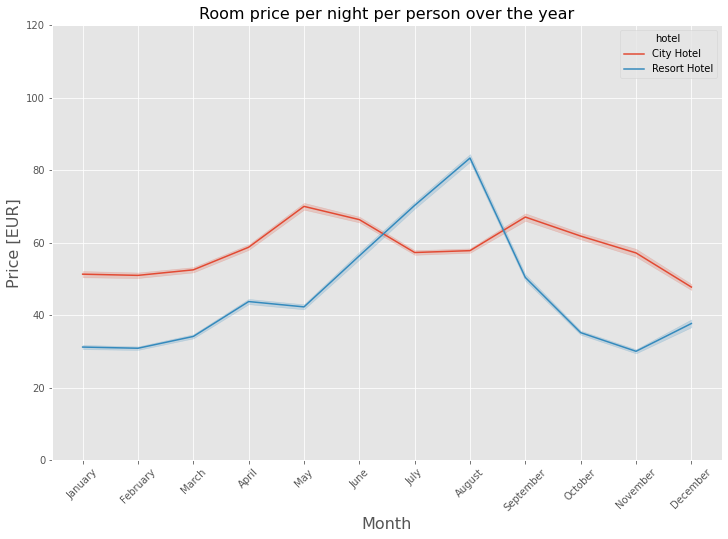

In [244]:

###
plt.figure(figsize = (12,8))
sns.lineplot(data = room_prices_monthly, x = 'arrival_date_month', y = 'adr_pp' ,
             hue = 'hotel')
plt.title("Room price per night per person over the year", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Price [EUR]", fontsize=16)
plt.ylim(0,120)
plt.show()

* The price for resort hotel is high during the summer season. Price of the city hotel doesn't vary much over the seasons. 
* Remaining months of the year, the city hotel is priced almost 50% higher than the resort hotel.

### Which countries account for major portion of customers during the summer in resort hotel?

In [245]:
####
summer = pd.merge(room_prices_monthly,hotel['country'],left_index=True, right_index = True )

In [246]:
summer = summer.loc[(summer['month_num']==6) | (summer['month_num']==7) | (summer['month_num']==8)]

In [247]:
top10 = px.pie(summer,
        names = summer.country.value_counts().index[:10],
        values = summer.country.value_counts().values[:10],
        title = 'Top 10 Countries visiting resort during summer')
top10.update_traces(textposition="inside", textinfo="value+percent+label")
top10.show()

* We can see the percentage is high for the native and surrounding countries of portugal.

### Which are the most busy month?

In [248]:
# we will decide busiest month based on the bookings it received
# We can room_prices_monthly for this task as well
room_prices_monthly.groupby('arrival_date_month').count().sort_values(by=['hotel'],ascending = False)

,hotel,adr_pp,month_num
arrival_date_month,,,
August,8624,8624,8624
July,7907,7907,7907
May,7103,7103,7103
October,6901,6901,6901
March,6620,6620,6620
April,6560,6560,6560
June,6395,6395,6395
September,6385,6385,6385
February,5359,5359,5359


* We see august,july,may etc with highest bookings but In the data, the bookings are from 2015 july to 2017 aug 31st. So we count aug and july thrice but remaining all months twice. 

In [249]:
city_demand = room_prices_monthly[room_prices_monthly['hotel'] == 'City Hotel']
resort_demand = room_prices_monthly[room_prices_monthly['hotel'] == 'Resort Hotel']

In [250]:
values_city = city_demand.arrival_date_month.value_counts(sort=False).values
values_resort = resort_demand.arrival_date_month.value_counts(sort=False).values
months = city_demand.arrival_date_month.value_counts(sort=False).index

In [251]:
# Normalizing each month as these are repeated twice on overall
values_city //= 2
values_resort //= 2
# August and July repeated thrice so, we will just do 2/3 times to get overall effect of one third.
values_city[6:8] = (values_city[6:8] * 2)//3
values_resort[6:8] = (values_resort[6:8] * 2)//3

<Figure size 864x576 with 0 Axes>

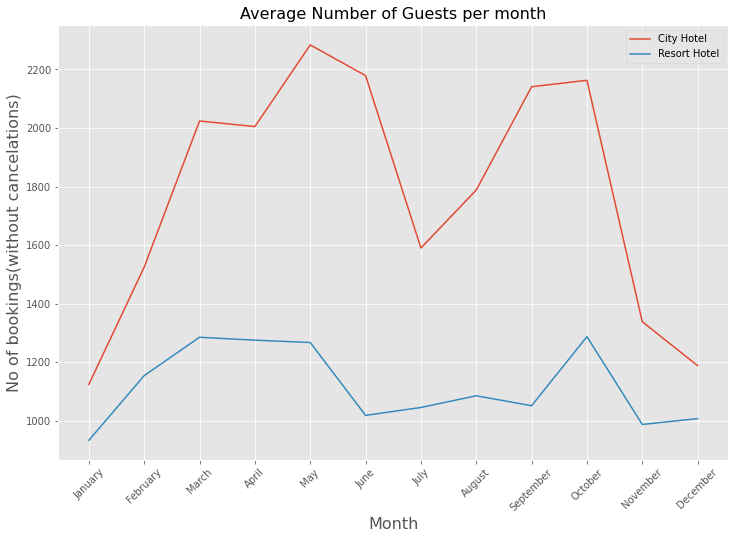

In [252]:
plt.figure(figsize = (12,8))
fig, ax = plt.subplots(figsize = (12,8))
ax= sns.lineplot(x= months, y=values_city)
ax1 = sns.lineplot(x = months, y = values_resort)
plt.title("Average Number of Guests per month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("No of bookings(without cancelations)", fontsize=16)
plt.legend(['City Hotel', 'Resort Hotel'])
plt.show()

* Number of guests is maximum for resort hotel in the may and october month.It is spring in may and autumn in october in portugal.
It is suggested by google that (march to may) and (sept-oct) are the best months to visit portugal and we can visually confirm it with the number of visitors being high!
* July snd august the visitors are less even though prices are lowest.
* Guest numbers for the Resort hotel go down slighty from June to September, which is also when the prices are highest.


### How long people stay at hotels?

In [253]:
###
hotel_nc['total_days'] = hotel_nc['stays_in_weekend_nights'] + hotel_nc['stays_in_week_nights']

In [254]:
nights = hotel_nc.groupby(by = ['total_days','hotel']).agg('count').reset_index()
nights = nights.iloc[:,:3]
nights.rename(columns = {'is_canceled':'no_of_nights_stayed'},inplace=True)


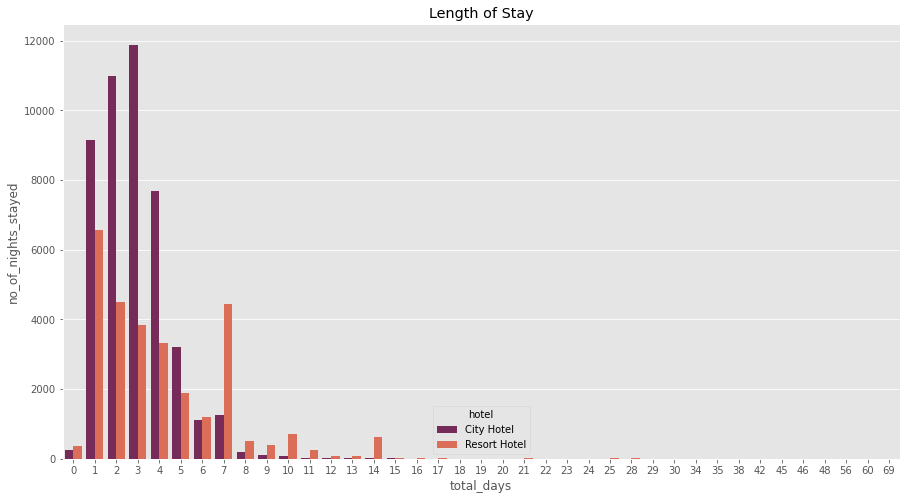

In [255]:
plt.figure(figsize=(15,8))
sns.barplot(data = nights,x = 'total_days',y = 'no_of_nights_stayed'
            ,hue = 'hotel',palette='rocket')
plt.title('Length of Stay')
plt.show()

* It is clear from plot that in **city hotel**,people prefer to stay for short span of 1-4 days. 
* In **resort hotel**, most prefer **longer stay**. It might be that hotel is offering a weekly discount and also most people come to resort for vacation.

### How many bookings does each segment account for?

In [256]:
## Let us check including the cancelations also
segments = px.pie(data_frame=hotel,
                names = hotel.market_segment.value_counts().index,
                values=hotel.market_segment.value_counts().values,
                template='seaborn')
segments.update_traces(textposition="inside", textinfo="value+percent+label")
segments.show()

* Major chunk of booking is made through **Travel agents**(online/offline).

## Exploring the cancellations

In [257]:
hotel_cancel = hotel[hotel['is_canceled']==1]
city_cancel = hotel[(hotel['is_canceled']==1) & (hotel['hotel']=='City Hotel')]
resort_cancel = hotel[(hotel['is_canceled']==1) & (hotel['hotel']=='Resort Hotel')]

### Cancellations per market segment


In [258]:
cm = px.pie(data_frame=hotel_cancel,
    names = hotel_cancel.market_segment.value_counts().index,
    values = hotel_cancel.market_segment.value_counts().values)
cm.update_traces(textposition="inside", textinfo="value+percent+label")
cm.show()

* Interesting thing is groups have overall bookings(with&without canceled) of 19,711 and 12,094 of these account for cancelation.
* It means 60% of the bookings from this segment is being cancelled. Hotel can focus this segment and provide them with offers,discounts,complementaries to reduce cancelations.
* Another interesting note is **booking made directly out of 12,600, only 1950 got cancelled**
* It means only 15% of booking made through direct medium is canceled.
* This will be a important column for model.

### Cancellations over the year for resort and city hotel


In [259]:
# For sorting wrt to month, we need to have month numbers
hotel_cancel['month_num'] = hotel_cancel['arrival_date_month'].replace(month_dic)
cancellation_per_month = hotel_cancel.sort_values(by=['month_num'])
# Making a pivot table where each row represents no of bookings per month in each hotel
cancellation_per_month = pd.pivot_table(cancellation_per_month,columns='hotel',
                index='arrival_date_month',values='is_canceled',aggfunc='count',sort=False)
# Since in pivot table, index will be months and it is easier to plot, if its column. so this will do the job.
cancellation_per_month = cancellation_per_month.reset_index()

In [260]:
# Normalizing each month as these are repeated twice on overall
# August and July repeated thrice so, we will just do 2/3 times to get overall effect of one third.
cancellation_per_month[['City Hotel','Resort Hotel']] //= 2 
cancellation_per_month.loc[[6,7],['City Hotel','Resort Hotel']] *= 2
cancellation_per_month.loc[[6,7],['City Hotel','Resort Hotel']] //= 3  

In [261]:
px.line(cancellation_per_month, x = 'arrival_date_month',y=['City Hotel','Resort Hotel'],
        title='No of cancellations over the year',template='plotly_dark')


* For city hotel, cancellations are more in spring and autumn(where bookings were also highest).I guess due to the excess demand during these months, hotel may be using overbooking strategy.
* For resort hotel, there is very little variation of cancellations over the year and also cancellations were highest during august where also booking were high.

### Lead time vs cancellations

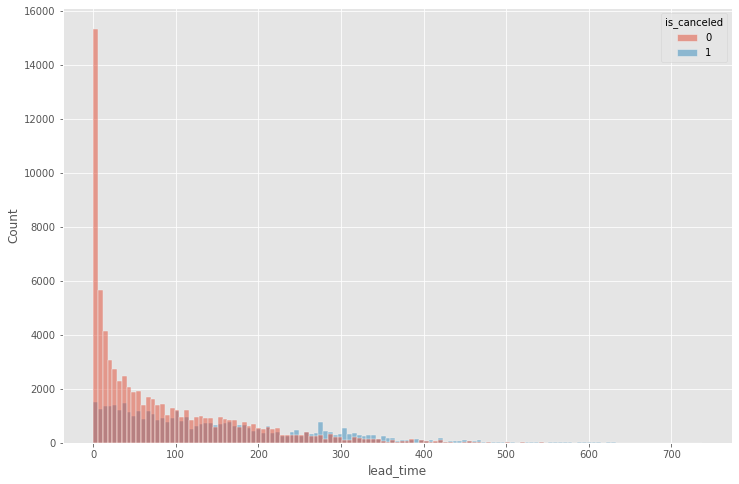

In [262]:
###

plt.figure(figsize= (12,8))
sns.histplot(hotel, x = 'lead_time',hue = 'is_canceled')
plt.show()

* Both are overlapping and also this feature has many outliers. It is very unlikely to book prior 300-600 days.
* We can see lead time of '0' booking are most unlikely to get canceled.


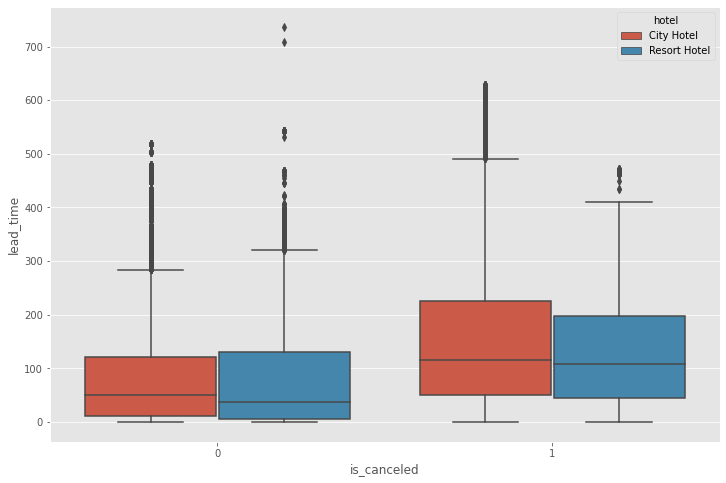

In [263]:
plt.figure(figsize= (12,8))
sns.boxplot(data = hotel, x = 'is_canceled' , y = 'lead_time',hue = 'hotel',
            hue_order=['City Hotel','Resort Hotel'])
plt.show()

* so many outliers in this column

### Days in waiting list vs Cancellations


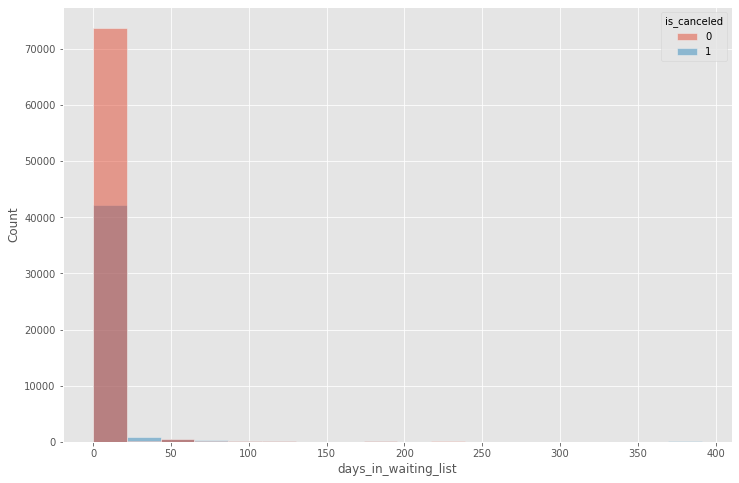

In [264]:
###

plt.figure(figsize= (12,8))
sns.histplot(hotel, x = 'days_in_waiting_list',hue = 'is_canceled')
plt.show()

### 

In [265]:
hotel[['reservation_status','is_canceled']].value_counts()

reservation_status  is_canceled
Check-Out           0              75011
Canceled            1              42993
No-Show             1               1206
dtype: int64

* This reservation_status must be excluded in the feature space. It contains information about the target and this induces data leakage
* There might be some more columns, we need to check

### Deposit Type vs Cancellations

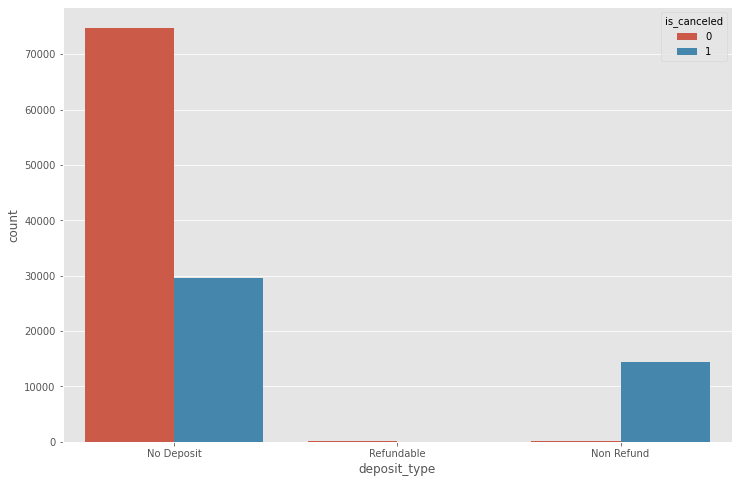

In [266]:
plt.figure(figsize= (12,8))
sns.countplot(data = hotel, x = 'deposit_type',hue = 'is_canceled')
plt.show()

### repeated guests vs cancelations

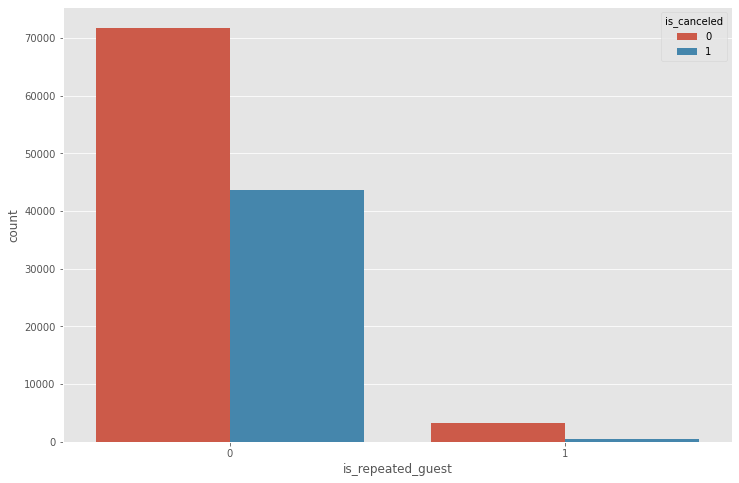

In [267]:
plt.figure(figsize= (12,8))
sns.countplot(data = hotel, x = 'is_repeated_guest',hue = 'is_canceled')
plt.show()

* For repeated guests, the cancelation ratio is quite less compared to first time customers.

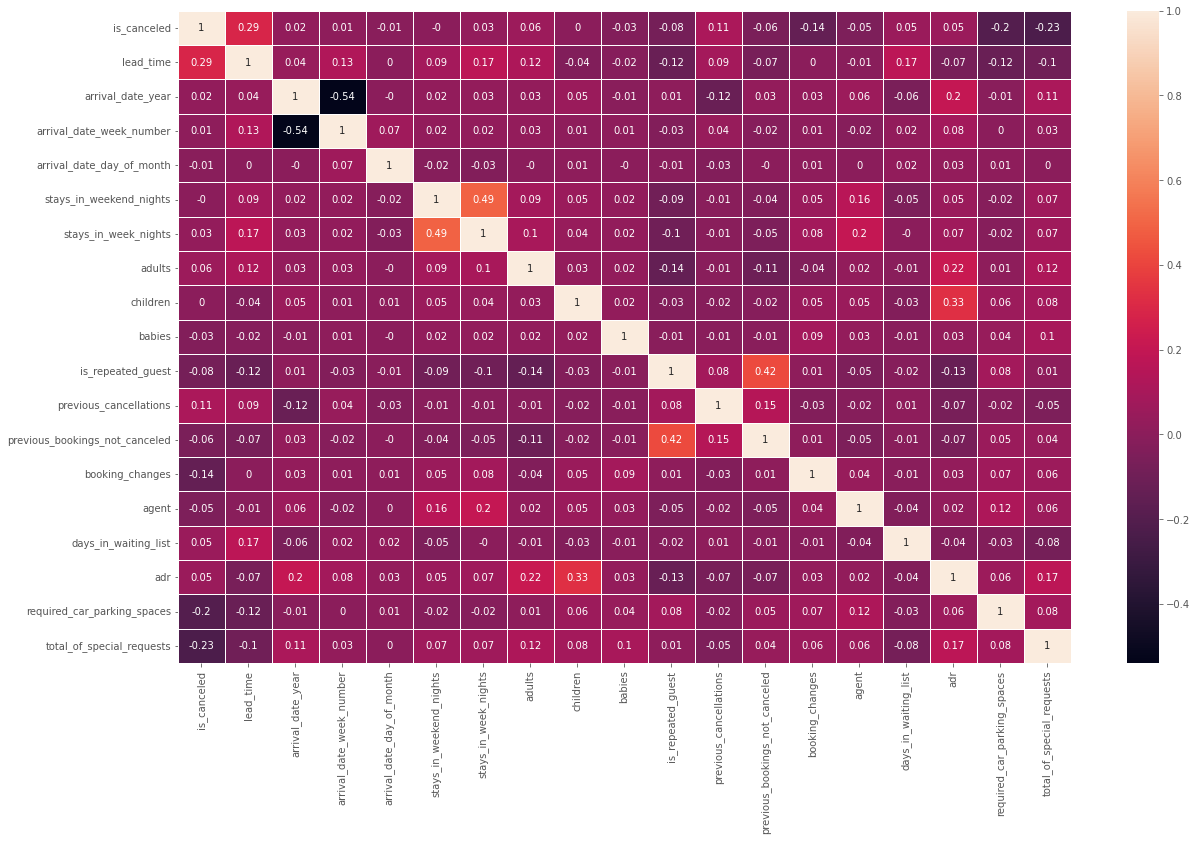

In [268]:
plt.figure(figsize=(20,12))
sns.heatmap(round(df.corr(),2),annot=True,cmap='rocket',linewidths = 1)
plt.show()

## Data Pre-processing

In [269]:
# From the knowledge that i gathered from EDA, i will make some decisions on which features to include.
# i also used correlation as a factor for making decisions regarding numerical features.
useless_columns = ['arrival_date_year','arrival_date_week_number','arrival_date_day_of_month','reservation_status',
                   'reservation_status_date','days_in_waiting_list','previous_bookings_not_canceled','booking_changes']

In [270]:
df = df.drop(useless_columns,axis = 1)

In [271]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations', 'reserved_room_type',
       'assigned_room_type', 'deposit_type', 'agent', 'company',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [272]:
# First i want to treat agent column, it represents a category and the number is just a ID and it doesn't have significance
# So inorder to use it as categorical feature only, i will just limit the number of different ID's(numbers).
# Agents having bookings less than 1000 are put into "Others" category

df['agent'].value_counts()

9.0      31922
0.0      16280
240.0    13922
1.0       7187
14.0      3633
         ...  
285.0        1
289.0        1
406.0        1
265.0        1
497.0        1
Name: agent, Length: 334, dtype: int64

* I will just include the top 5 agents from where the hotel is getting bookings. Remaining will be pushed into others category

In [273]:
# Replacing the top 4 frequent agents with ranks 1,2,3,4 according to their counts.
df['agent'].replace({9.0 : 4 , 0.0 : 3 , 240.0 : 2 , 1.0 : 1} , inplace = True)
# As we know agents other than the above will get a seperate category and this category contain the largest booking
# so i will give it a rank of 5
df.loc[(df['agent'] != 4.0) & (df['agent'] != 3.0) & (df['agent'] != 2.0) & (df['agent'] != 1.0),'agent'] = 5

In [274]:
df['agent'].value_counts()

5.0    48354
4.0    31969
3.0    17616
2.0    14084
1.0     7187
Name: agent, dtype: int64

* Reduced the cardinality of agent column down to 5.

In [275]:
# Converting the country categories into top 3 important categories
df['country'].replace(to_replace='PRT',value='Home_country',inplace = True)
df['country'].replace(to_replace=['GBR','ITA','FRA','ESP','DEU','IRL','BEL','BRA','NLD','USA'],
                        value = 'Neighbour_country',inplace=True)
# Converted many categories of countries to 3 important categories
df.loc[(df['country'] != 'Home_country') & (df['country'] != 'Neighbour_country'),'country'] = 'Others'

In [276]:
df['country'].value_counts()

Neighbour_country    54261
Home_country         48961
Others               15988
Name: country, dtype: int64

* Reserved_room_type column doesn't look like a potential feature to me in itself, so i will just transform it.
* Let us engineer a new feature which will give information about **Whether reserved and assigned room type are same?**
* It will be a boolean column

In [277]:
# I named the column fate owing to its randomness(just kidding)... 
df['fate'] = df['reserved_room_type'] == df['assigned_room_type']
df.drop('assigned_room_type',axis = 1,inplace=True)

In [278]:
df.fate.value_counts()

True     104414
False     14796
Name: fate, dtype: int64

* So most of the bookings assigned and reserved room are same.

#### Columns - ADR and lead_time have outliers, let us treat some of those

In [279]:
# Capping the lead time with upper limit of 600. Global avg lead time is 24 days.I wonder how these lead_time is so high 
df.loc[df['lead_time'] > 600,'lead_time'] = 600
# average daily revenue cannot be negative, so capping neagative values with zero 
df.loc[df['adr'] < 0,'adr'] = df['adr'].mean()

> Spliting the dataset

In [280]:
# Employing a stratified split based on the hotel column.
# I want to have equal proportion of resort and city hotel as i'm trying to generalize to both.
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["hotel"]):
    strat_train_set = df.iloc[train_index]
    strat_test_set = df.iloc[test_index]

In [287]:
# Deriving the training set
X_train = strat_train_set.drop('is_canceled',axis = 1)
y_train = strat_train_set['is_canceled']
# Deriving the test set
X_test = strat_train_set.drop('is_canceled',axis = 1)
y_test = strat_train_set['is_canceled']

In [288]:
# Numerical_features includes both continous and discrete features
numerical_features = ['lead_time','adults','children','babies',
                        'previous_cancellations','adr','is_repeated_guest','required_car_parking_spaces','total_of_special_requests',
                        'stays_in_week_nights','stays_in_weekend_nights']
# One hot features include all the nominal features and i reduced the cardinality of the features.
# we can avoid all the issues related to cardinality of features
categorical_features = ['hotel','company','fate','meal','country','arrival_date_month',
                    'market_segment','distribution_channel','reserved_room_type',
                    'deposit_type','customer_type','agent']

In [289]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

# Building a total preprocessing transformer combing numerical and categorical features
num_transformer = Pipeline([('Scaler',StandardScaler())])
cat_transformer = Pipeline([('One_hot',OneHotEncoder())])

preprocessor = ColumnTransformer(transformers=[("num", num_transformer, numerical_features),
                                               ("cat", cat_transformer, categorical_features)])

In [290]:
# Preprocessing the data before training using the column transformer
X_train = preprocessor.fit_transform(X_train)

# Converting the labels
lb_encoder = LabelEncoder()
y_train = lb_encoder.fit_transform(y_train)
#####################################################



* Preprocessing part is completed, let us head to Model building.
* We will try out various models and shortlist the promissing models.

In [304]:
from sklearn.metrics import accuracy_score,roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score,cross_val_predict
# Let us create a function to train, cross validate our model.
def train_evaluate(model,X_train,y_train,name):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    accuracy_train = accuracy_score(y_train,y_pred)

    #Cross validation
    acc_score = cross_val_score(model,X_train,y_train,scoring='accuracy',cv=10) 
    ## Ploting the Confusion matrix and auc-roc curve
    fpr, tpr, thresholds = roc_curve(y_train,y_pred)
    conf_matrix = confusion_matrix(y_train,y_pred)

    # Ploting the confusion matrix
    plt.figure(figsize = (12,8))
    plt.subplot(1,2,1)
    sns.heatmap(conf_matrix, annot=True, cmap='Blues',fmt='g')
    plt.title('confusion_matrix')
    plt.xlabel('Predicted_values', fontsize=16)
    plt.ylabel('Actual Values', fontsize=16)
    # ploting the AUC_ROC curve
    plt.subplot(1,2,2)
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

    
    # returning the scores
    score = pd.DataFrame({'Name' : name ,'Accuracy_trainset' : [accuracy_train], 
                        'Accuracy_validationset' : [acc_score.mean()]})
    return score



### Model Building and Evaluation

#### Logistic Regression

,Name,Accuracy_trainset,Accuracy_validationset
0,Logistic Regression,0.82318,0.822215


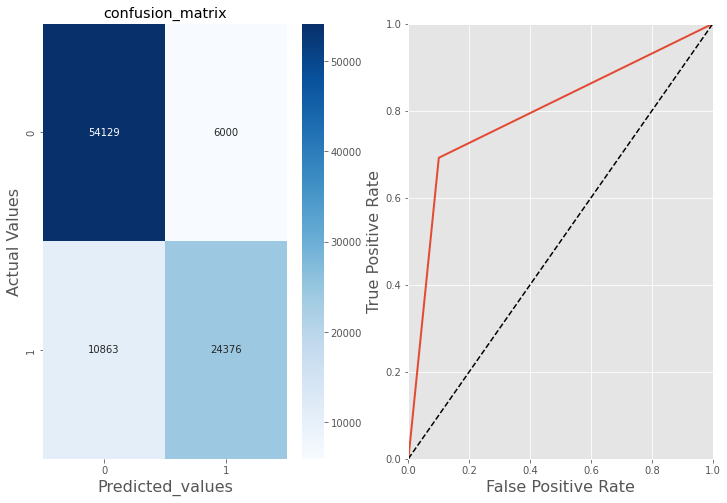

In [305]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(penalty='l1',solver='liblinear')

train_evaluate(log_reg,X_train,y_train,'Logistic Regression')


#### SVM

,Name,Accuracy_trainset,Accuracy_validationset
0,Support Vector Classifier,0.861484,0.855916


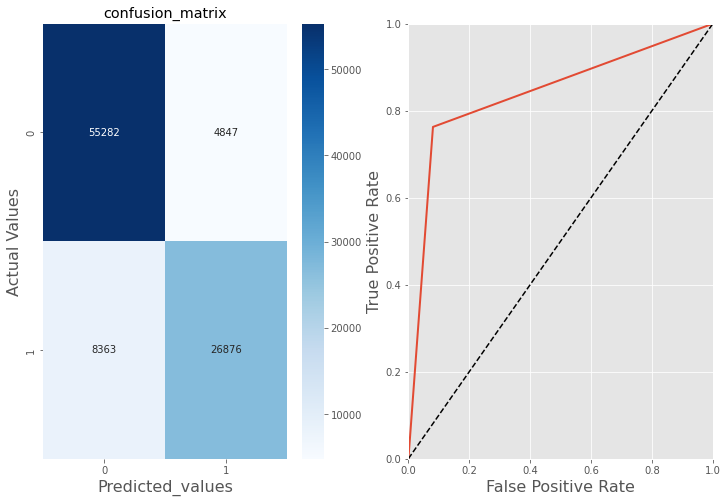

In [307]:
#from sklearn.svm import SVC
#svc_clf = SVC()
#train_evaluate(svc_clf,X_train,y_train,'Support Vector Classifier')

,Name,Accuracy_trainset,Accuracy_validationset
0,DecisionTreeClassifier,0.995281,0.854595


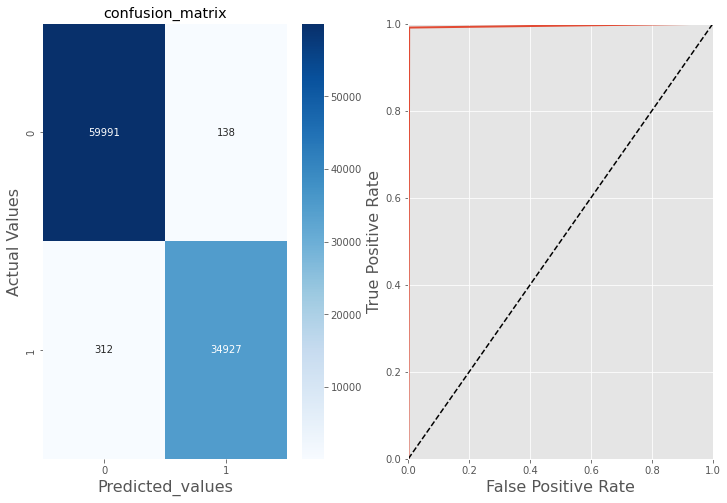

In [309]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=42)
train_evaluate(dt_clf,X_train,y_train,'DecisionTreeClassifier')

> Let us try ensemble methods

,Name,Accuracy_trainset,Accuracy_validationset
0,RandomForestClassifier,0.99525,0.885654


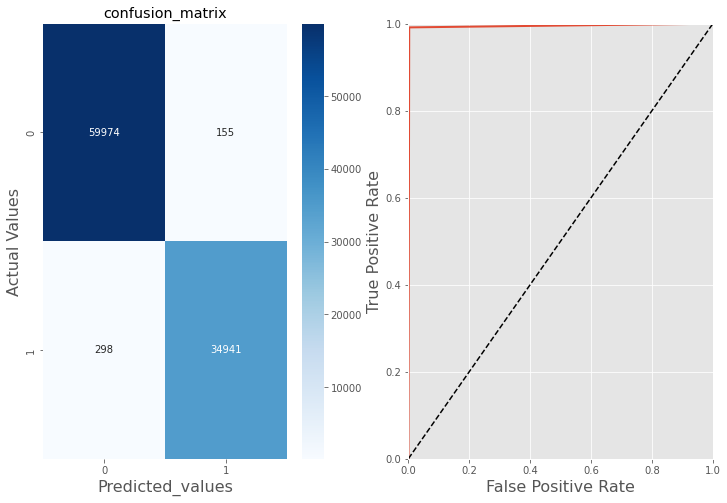

In [310]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(random_state=42)
train_evaluate(rnd_clf,X_train,y_train,'RandomForestClassifier')

,Name,Accuracy_trainset,Accuracy_validationset
0,ADA BOOST CLASSIFIER,0.995281,0.870313


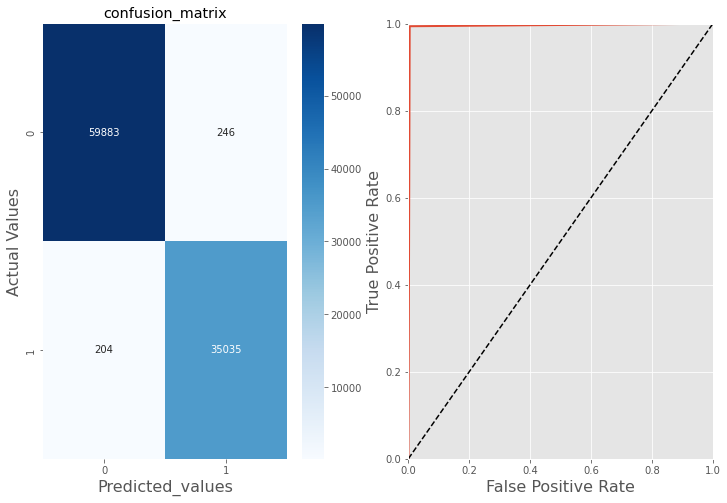

In [311]:
from sklearn.ensemble import AdaBoostClassifier
dt_clf_ada = DecisionTreeClassifier()
Ada_clf = AdaBoostClassifier(base_estimator=dt_clf_ada,random_state=42)

train_evaluate(Ada_clf,X_train,y_train,"ADA BOOST CLASSIFIER")

,Name,Accuracy_trainset,Accuracy_validationset
0,GradientBoosting CLASSIFIER,0.851973,0.851093


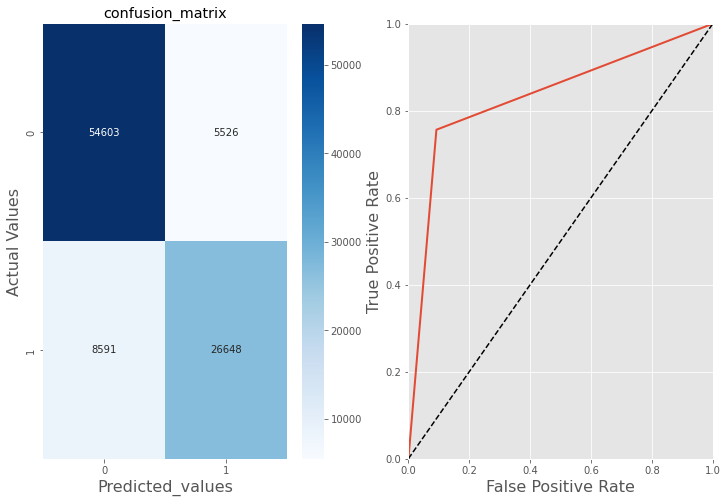

In [312]:
from sklearn.ensemble import GradientBoostingClassifier
gdb_clf = GradientBoostingClassifier(random_state=42,subsample=0.8)

train_evaluate(gdb_clf,X_train,y_train,"GradientBoosting CLASSIFIER")

,Name,Accuracy_trainset,Accuracy_validationset
0,XG Boost CLASSIFIER,0.88904,0.874423


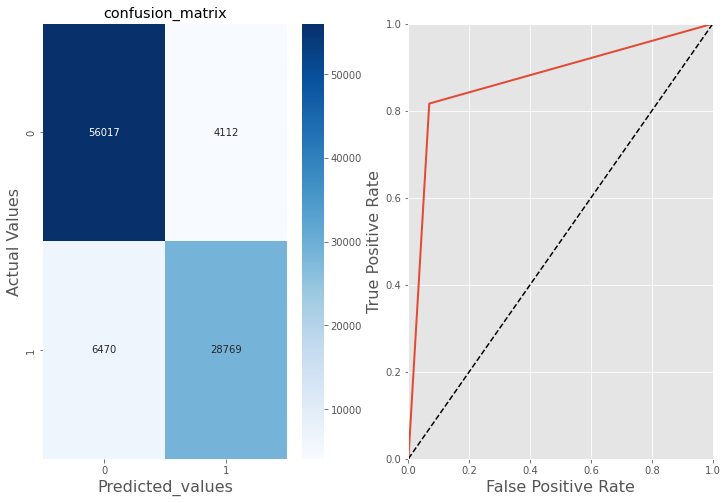

In [313]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(verbosity = 0)
train_evaluate(xgb_clf,X_train,y_train,"XG Boost CLASSIFIER")

### Shortlisting the promising Models
* SVM
* Random Forest
* Gradient Boosting
* XGBoost

In [16]:
from sklearn.model_selection import GridSearchCV
param_distribs = {
        'kernel': ['linear', 'rbf','polynomial'],
        'C': [0.01,0.01,0.1,0.15,0.2,0.25,0.5,0.75,1,2,10,100],
        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    }
svm_clf = SVC()
grid_cv = GridSearchCV(svm_clf , param_grid = param_distribs,
                              cv=5,scoring='accuracy',
                              verbose=1)
grid_cv.fit(X_train,y_train)

NameError: name 'SVC' is not defined